### Loading Data

In [1]:
import pandas as pd
books = pd.read_csv("data.csv")
books

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [2]:
books.shape

(4657, 4)

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


In [4]:
books["genre"].unique()

array(['fantasy', 'science', 'crime', 'history', 'horror', 'thriller',
       'psychology', 'romance', 'sports', 'travel'], dtype=object)

In [5]:
books["genre"].value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

In [6]:
books.drop(columns="index", inplace=True)
books

,title,genre,summary
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...
4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


### Visualising various genres

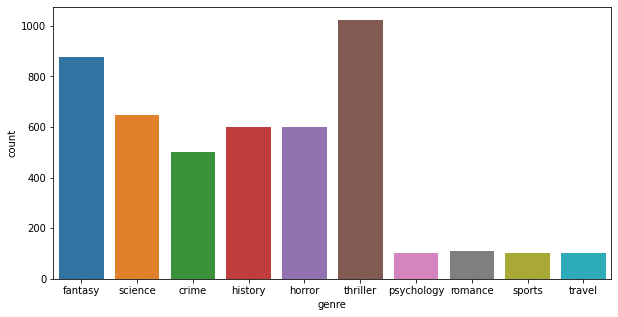

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
graph = sns.countplot(x = books['genre'])

### Cleaning Data - Summary Text

##### Create a function to apply various cleaning processes on the summary text
    Lowercasing the data
    Removing Punctuations
    Removing HTML COde and URL Links
    Spell Check
    Tokenization
    Removing Stop Words
    Normalization (Stemming, Lemmatization)
    Removing extra space
    Replacing the repetitions of punctations
    Removing Numbers
    Removing Emojis
    Removing emoticons
    Removing Contractions
###### Code by ATHARVA INAMDAR on Kaggle
    def clean_text(text):
        text = str(text).lower() # Lowering the case
        text = re.sub('\[.*?\]', '', text) #Remove any text in the square brackets
        text = re.sub('https?://\S+|www\.\S+', '', text) # Remove any links present 
        text = re.sub('<.*?>+', '', text) # 
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
        text = re.sub('\n', '', text) # Removing the next line character
        text = re.sub('\w*\d\w*', '', text) # Removing the words contaitning numbers
        text = re.sub('[^a-zA-Z]', ' ', text)
        return text

In [8]:
import re
import string

def clean_data(new_summary):
    new_summary = str(new_summary).lower() # Lowering the case
    new_summary = re.sub('\[.*?\]', '', new_summary) #Remove any text in the square brackets
    new_summary = re.sub('https?://\S+|www\.\S+', '', new_summary) # Remove any links present 
    new_summary = re.sub('<.*?>+', '', new_summary) # 
    new_summary = re.sub('[%s]' % re.escape(string.punctuation), '', new_summary) # Remove punctuation
    new_summary = re.sub('\n', '', new_summary) # Removing the next line character
    new_summary = re.sub('\w*\d\w*', '', new_summary) # Removing the words contaitning numbers
    new_summary = re.sub('[^a-zA-Z]', ' ', new_summary)
    return new_summary

In [9]:
books['summary'] = books['summary'].apply(clean_data)
books

,title,genre,summary
0,Drowned Wednesday,fantasy,drowned wednesday is the first trustee among ...
1,The Lost Hero,fantasy,as the book opens jason awakens on a school b...
2,The Eyes of the Overworld,fantasy,cugel is easily persuaded by the merchant fia...
3,Magic's Promise,fantasy,the book opens with heraldmage vanyel returni...
4,Taran Wanderer,fantasy,taran and gurgi have returned to caer dallben...
...,...,...,...
4652,Hounded,fantasy,atticus o sullivan last of the druids lives pe...
4653,Charlie and the Chocolate Factory,fantasy,charlie buckets wonderful adventure begins whe...
4654,Red Rising,fantasy,i live for the dream that my children will be ...
4655,Frostbite,fantasy,rose loves dimitri dimitri might love tasha an...


### Processing Text Data